# GBD 2010 Mortality Analysis Project
Author: [Azadeh Asgari]

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('IHME_GBD_2010_MORTALITY_AGE_SPECIFIC_BY_COUNTRY_1970_2010.csv')
df.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,"19,241","318,292.90"
1,AFG,Afghanistan,1970,0-6 days,Female,"12,600","219,544.20"
2,AFG,Afghanistan,1970,0-6 days,Both,"31,840","270,200.70"
3,AFG,Afghanistan,1970,7-27 days,Male,"15,939","92,701.00"
4,AFG,Afghanistan,1970,7-27 days,Female,"11,287","68,594.50"


In [4]:
# Preprocessing
df['Number of Deaths'] = df['Number of Deaths'].str.replace(',', '').astype(float)
df['Death Rate Per 100,000'] = df['Death Rate Per 100,000'].str.replace(',', '').astype(float)
df.drop_duplicates(inplace=True)

In [5]:
# Dataset Summary
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            58905 non-null  object 
 1   Country Name            58905 non-null  object 
 2   Year                    58905 non-null  int64  
 3   Age Group               58905 non-null  object 
 4   Sex                     58905 non-null  object 
 5   Number of Deaths        58905 non-null  float64
 6   Death Rate Per 100,000  58905 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.1+ MB
None
               Year  Number of Deaths  Death Rate Per 100,000
count  58905.000000      5.890500e+04            58905.000000
mean    1990.000000      1.610994e+04             7062.866458
std       14.142256      1.543293e+05            24582.548947
min     1970.000000      0.000000e+00                5.500000
25%     1980.000000      1.660000e+02 

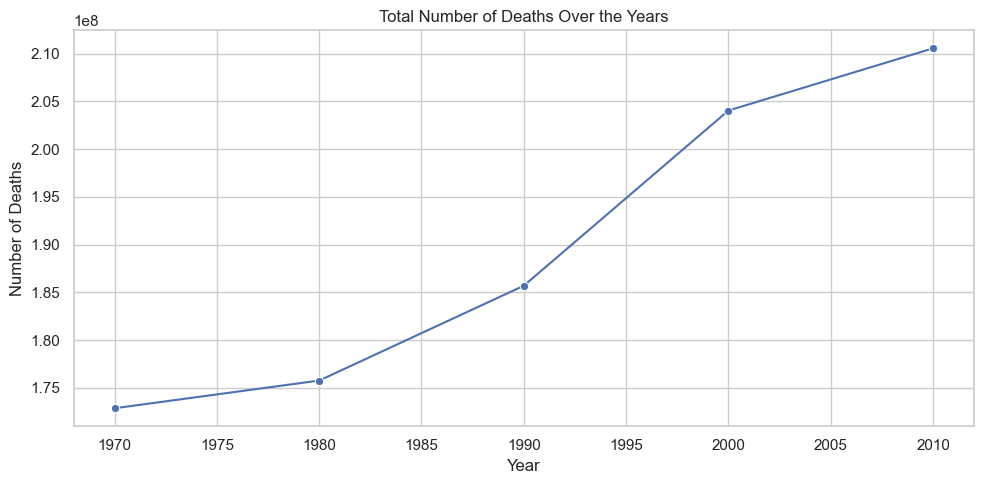

In [6]:
# Total Number of Deaths Over the Years
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
deaths_by_year = df.groupby('Year')['Number of Deaths'].sum()
sns.lineplot(x=deaths_by_year.index, y=deaths_by_year.values, marker="o")
plt.title('Total Number of Deaths Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()

## Continue analysis...


C:\Users\azade\AppData\Local\Temp\ipykernel_17080\1828341238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_death_rates.values, y=top_10_death_rates.index, palette="Reds_r")


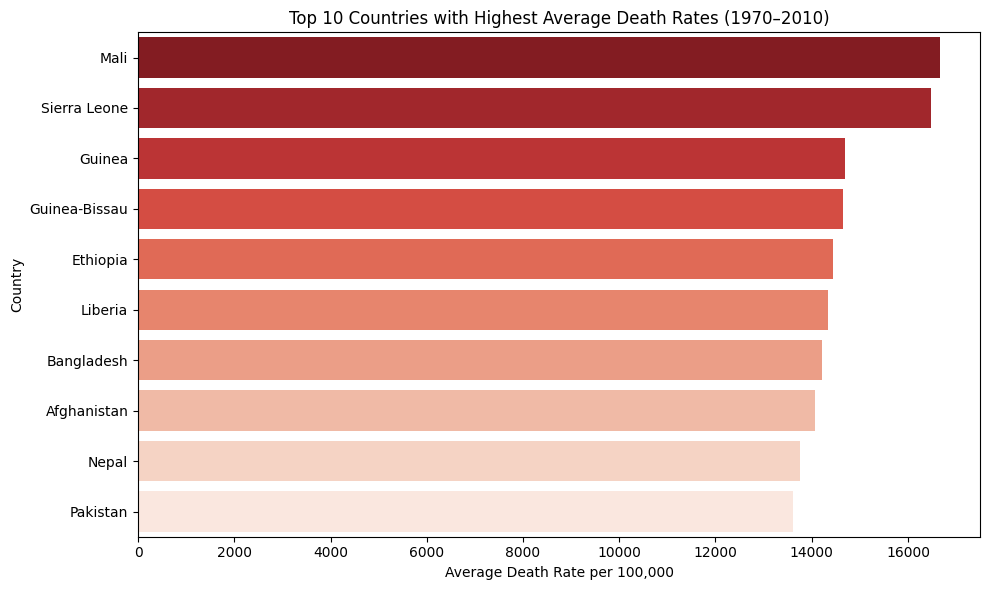

In [11]:
# Top 10 Countries with Highest Average Death Rates (1970–2010)
top_10_death_rates = df.groupby('Country Name')['Death Rate Per 100,000'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_death_rates.values, y=top_10_death_rates.index, palette="Reds_r")
plt.title('Top 10 Countries with Highest Average Death Rates (1970–2010)')
plt.xlabel('Average Death Rate per 100,000')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


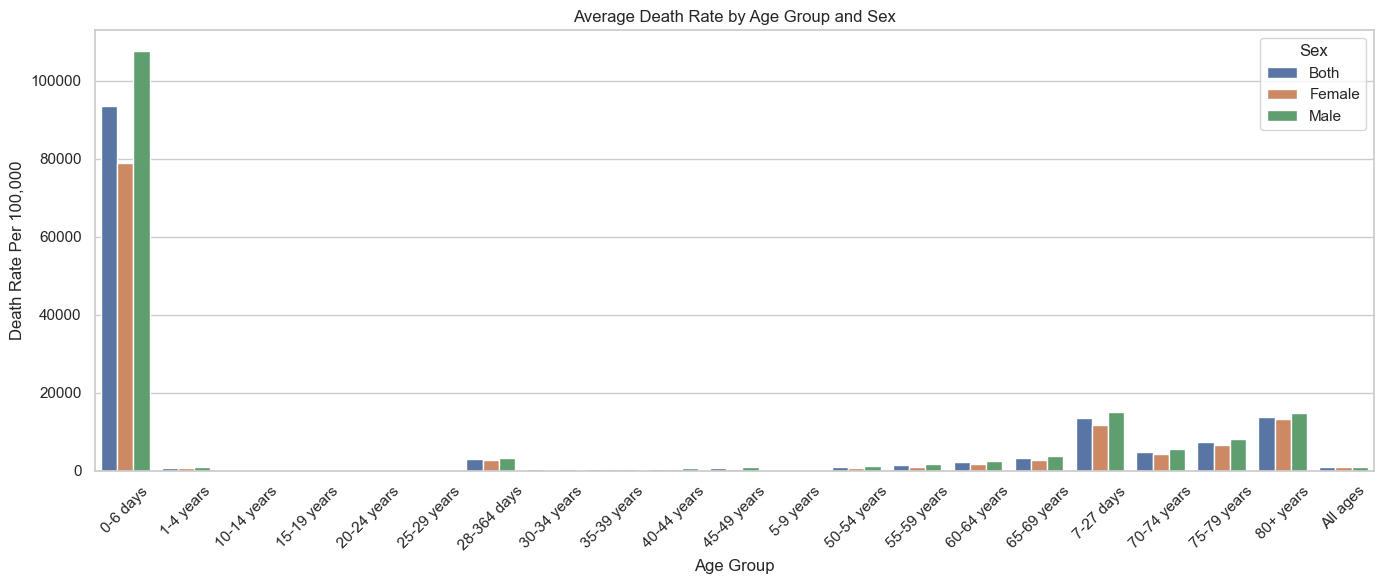

In [8]:
# Group by Age Group and Sex, calculate mean death rate
age_sex_death_rates = df.groupby(['Age Group', 'Sex'])['Death Rate Per 100,000'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=age_sex_death_rates, x='Age Group', y='Death Rate Per 100,000', hue='Sex')
plt.title('Average Death Rate by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Death Rate Per 100,000')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Trend Analysis by Country or Region
You can track how death rates have changed for a specific country over the years.

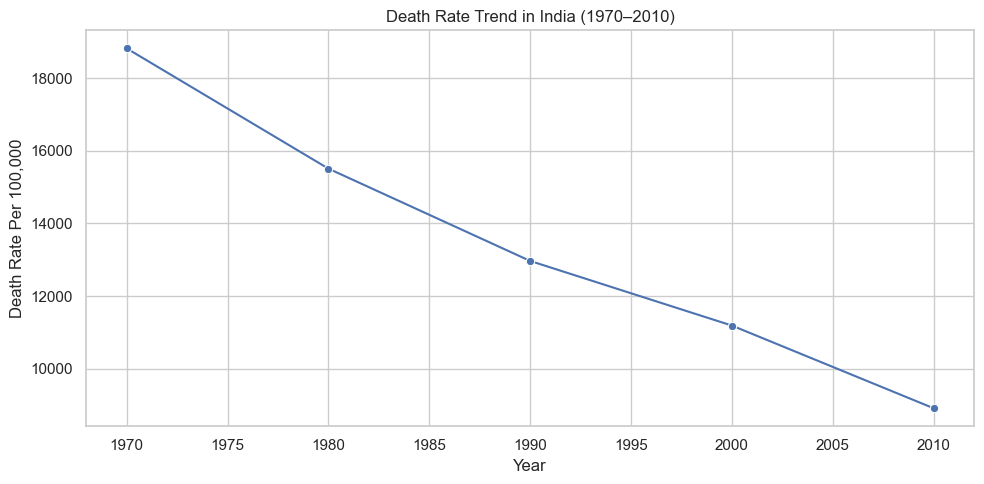

In [9]:
# Example: Death Rate Trend for India
country = "India"
country_data = df[df['Country Name'] == country]
trend = country_data.groupby('Year')['Death Rate Per 100,000'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=trend.index, y=trend.values, marker="o")
plt.title(f'Death Rate Trend in {country} (1970–2010)')
plt.xlabel('Year')
plt.ylabel('Death Rate Per 100,000')
plt.tight_layout()
plt.show()


Most Affected Age Group Globally
You can find which age group has the highest average death rate globally.

C:\Users\azade\AppData\Local\Temp\ipykernel_22760\461447510.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_avg.values, y=age_group_avg.index, palette="coolwarm")


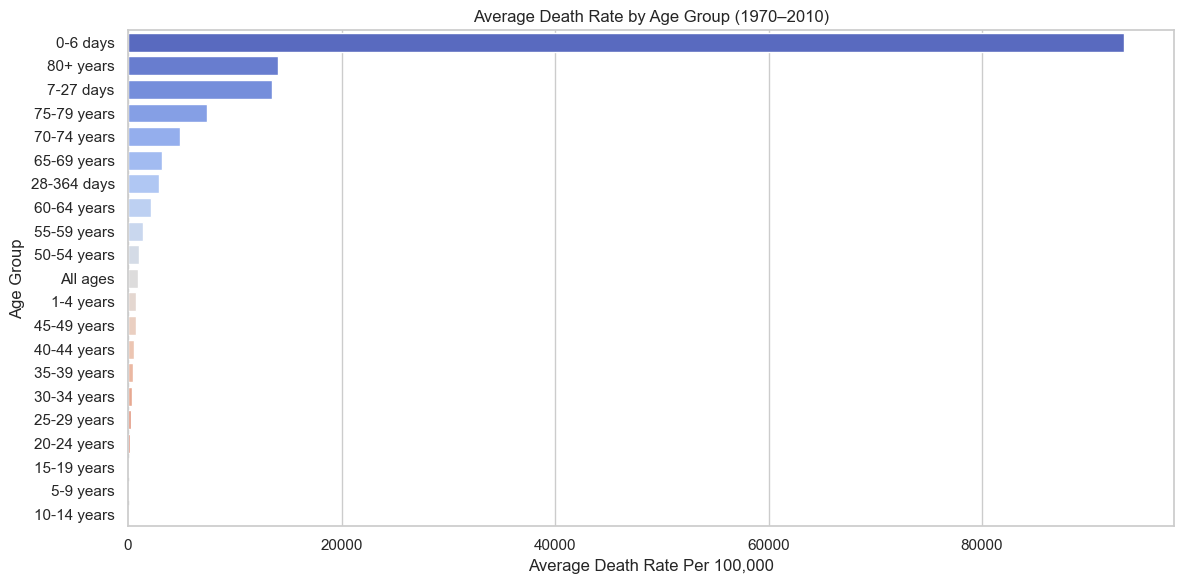

In [10]:
# Most Affected Age Group
age_group_avg = df.groupby('Age Group')['Death Rate Per 100,000'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_avg.values, y=age_group_avg.index, palette="coolwarm")
plt.title('Average Death Rate by Age Group (1970–2010)')
plt.xlabel('Average Death Rate Per 100,000')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


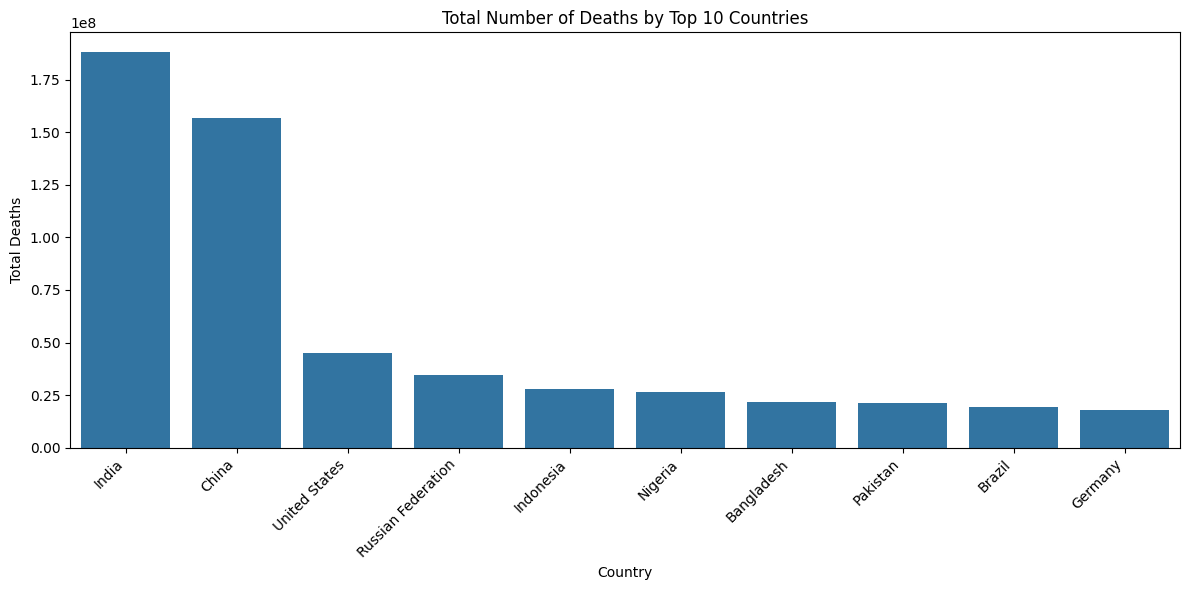

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('IHME_GBD_2010_MORTALITY_AGE_SPECIFIC_BY_COUNTRY_1970_2010.csv')

# 2. Preprocess the data
df['Number of Deaths'] = df['Number of Deaths'].str.replace(',', '').astype(float)
df['Death Rate Per 100,000'] = df['Death Rate Per 100,000'].str.replace(',', '').astype(float)
df.drop_duplicates(inplace=True)

# 3. Create the bar chart
country_deaths = df.groupby('Country Name')['Number of Deaths'].sum().reset_index()
top_country_deaths = country_deaths.sort_values(by='Number of Deaths', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country Name', y='Number of Deaths', data=top_country_deaths)
plt.title('Total Number of Deaths by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Box Plot: Distribution of Number of Deaths by Age Group

This box plot shows how Number of Deaths is distributed across different Age Group categories.

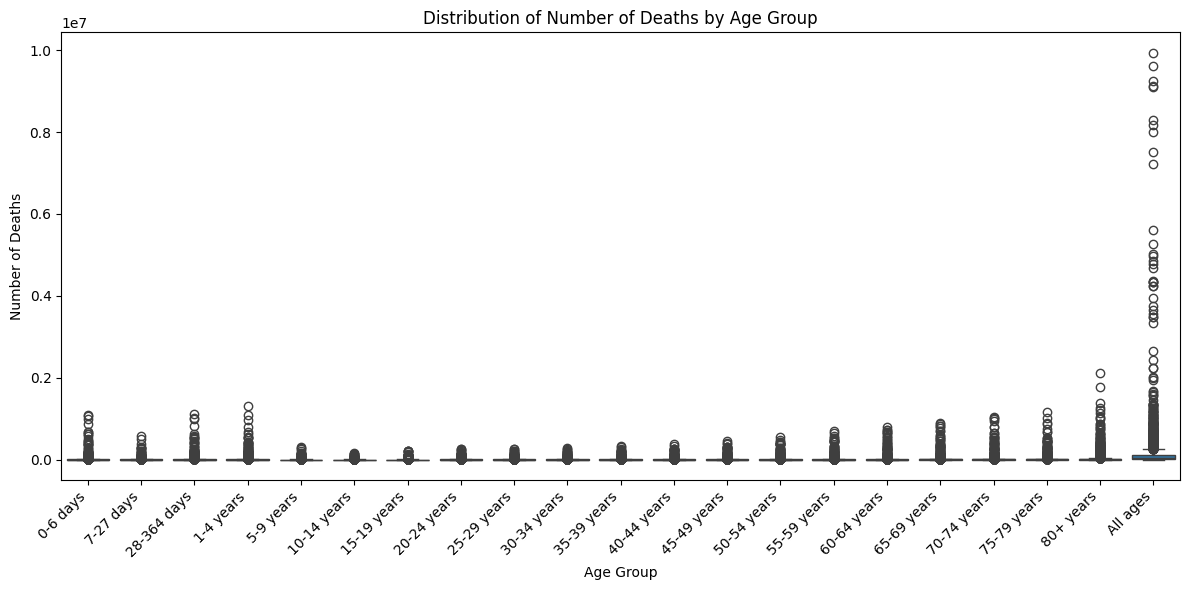

In [3]:
# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Number of Deaths', data=df)
plt.title('Distribution of Number of Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Box Plot: Death Rate Distribution by Year

This box plot will show the distribution of the death rate over the years in the dataset.

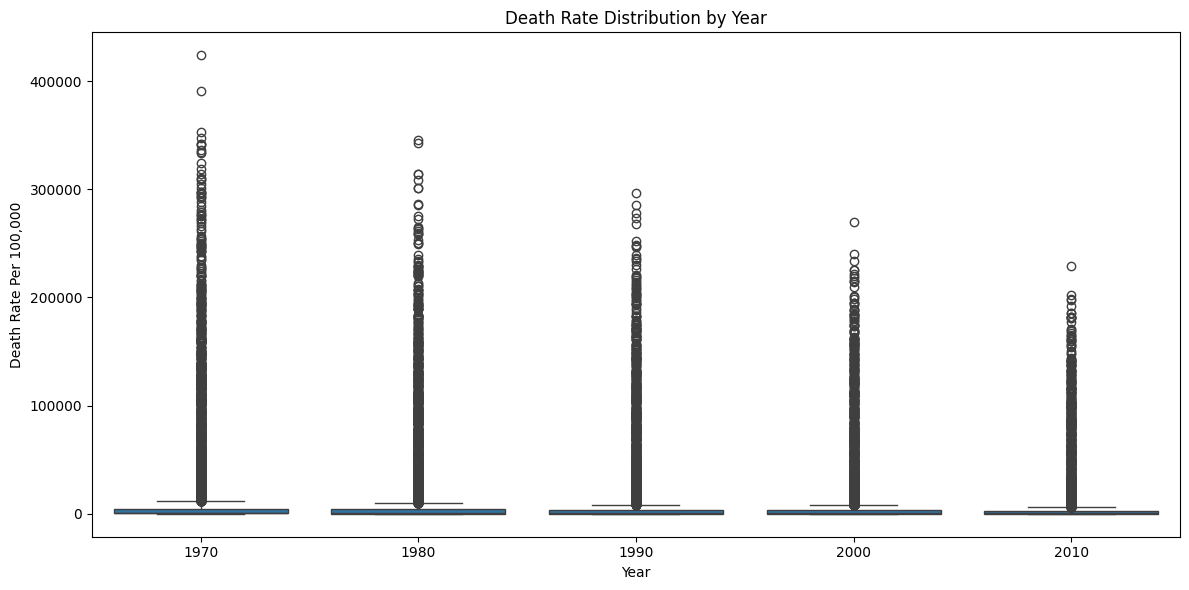

In [4]:
# Create a box plot to visualize the distribution of death rates by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Death Rate Per 100,000', data=df)
plt.title('Death Rate Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Death Rate Per 100,000')
plt.tight_layout()
plt.show()

 Scatter Plot: Death Rate vs. Number of Deaths

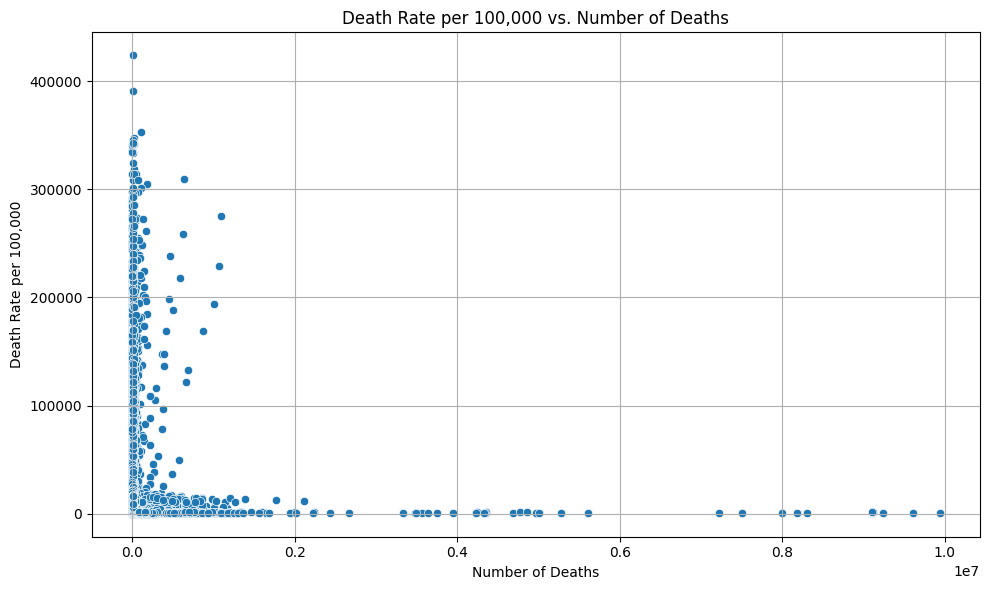

In [5]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Deaths', y='Death Rate Per 100,000', data=df)
plt.title('Death Rate per 100,000 vs. Number of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Death Rate per 100,000')
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()
plt.show()

 Scatter Plot: Year vs. Death Rate (with Age Group Coloring)

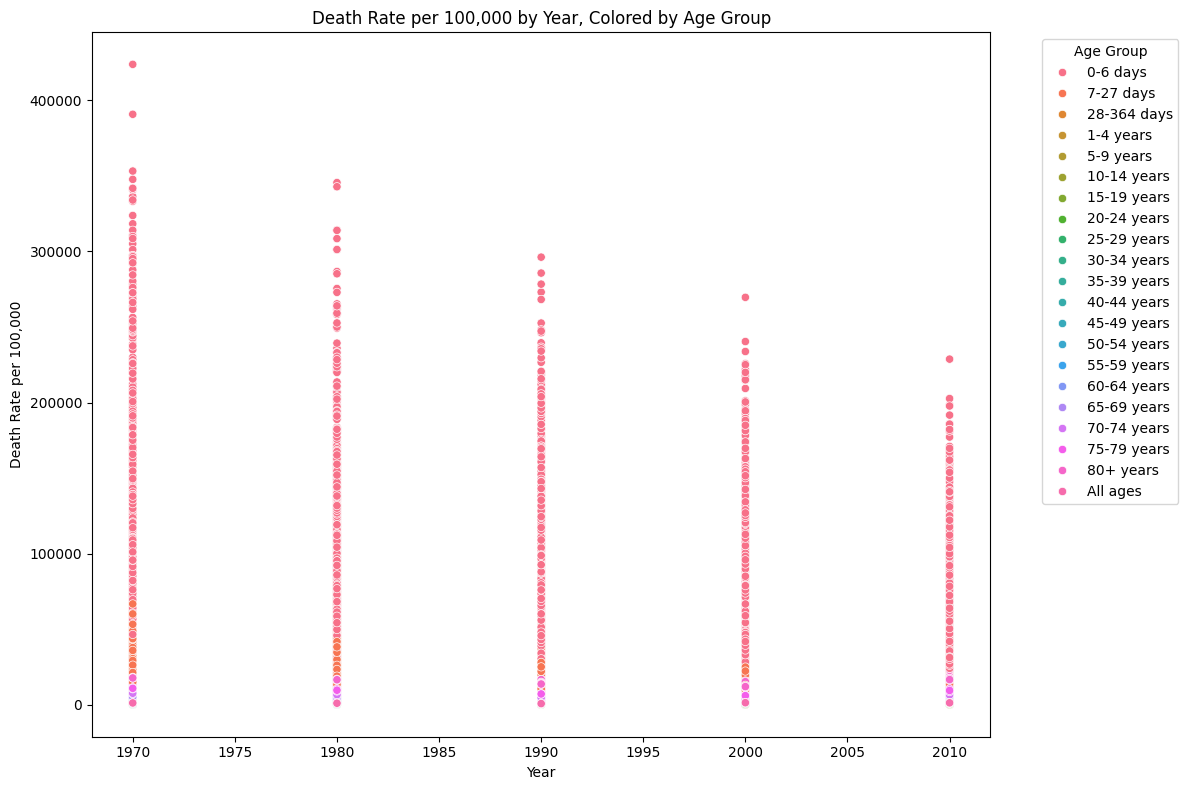

In [6]:
# Create the scatter plot with color-coding for Age Group
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='Death Rate Per 100,000', hue='Age Group', data=df)
plt.title('Death Rate per 100,000 by Year, Colored by Age Group')
plt.xlabel('Year')
plt.ylabel('Death Rate per 100,000')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()

 Scatter Plot: Year vs. Number of Deaths (with Sex Differentiation)

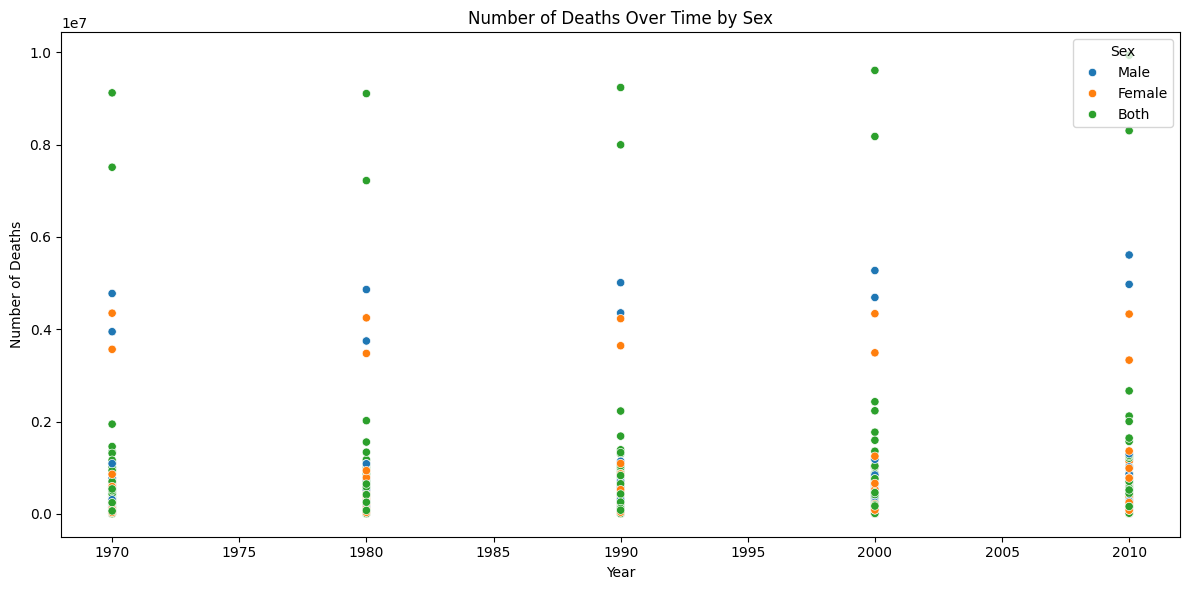

In [7]:
# Create the scatter plot to visualize the relationship between Year and Number of Deaths, differentiated by Sex.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Number of Deaths', hue='Sex', data=df)
plt.title('Number of Deaths Over Time by Sex')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

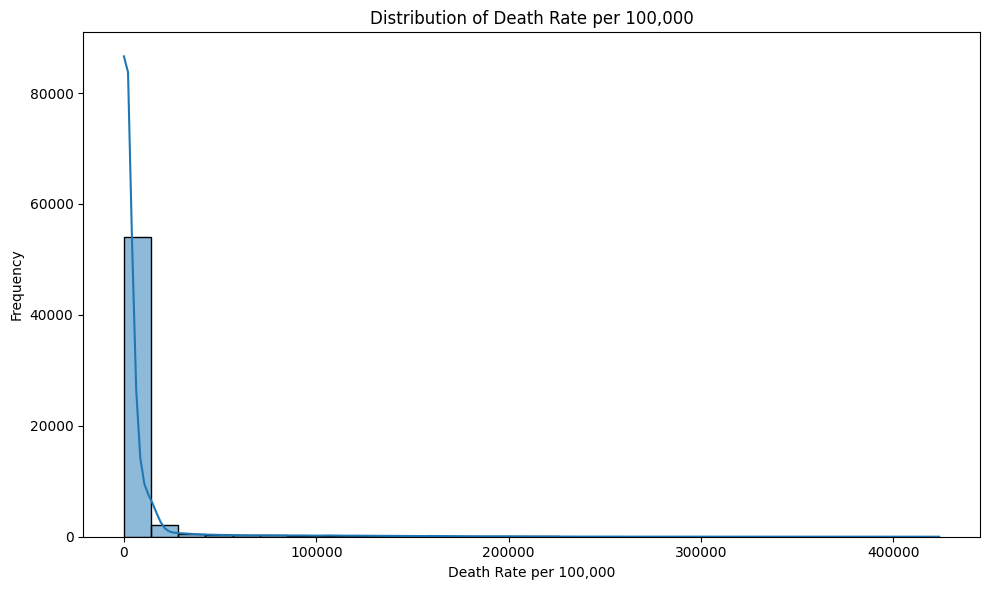

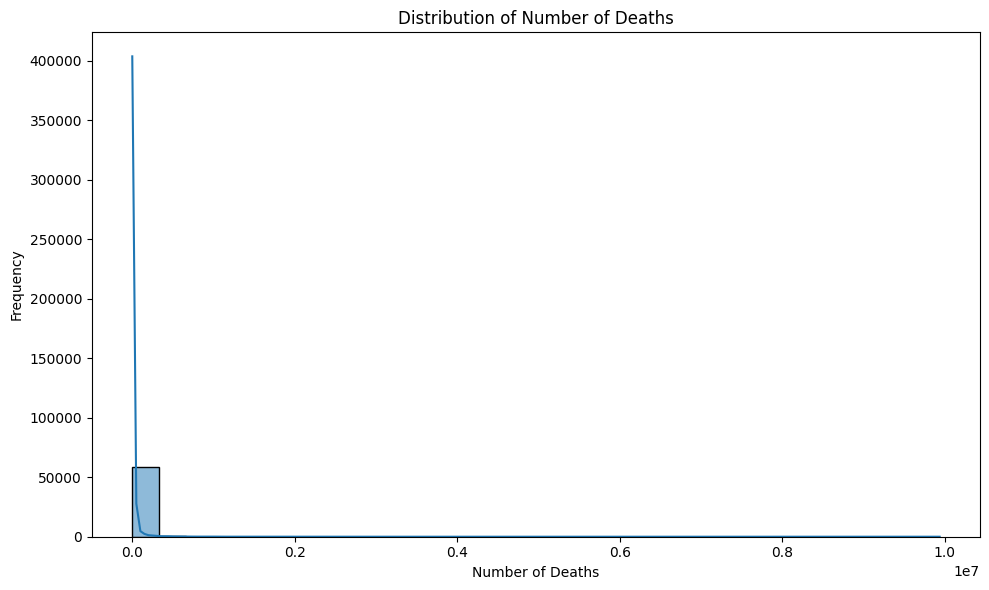

In [8]:
# Create a histogram to visualize the distribution of death rates
plt.figure(figsize=(10, 6))
sns.histplot(df['Death Rate Per 100,000'], bins=30, kde=True)  # Adjust bins as needed
plt.title('Distribution of Death Rate per 100,000')
plt.xlabel('Death Rate per 100,000')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create a histogram to visualize the distribution of number of deaths
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Deaths'], bins=30, kde=True)
plt.title('Distribution of Number of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

 Insights & Final Conclusion
📊 Key Insights:
Death Rates Rising Over Time: Global mortality shows a gradual increase from 1970 to 2010, influenced by population growth and better data capture.

Top 10 Countries by Death Rate: Countries with unstable healthcare systems or affected by war/pandemics (e.g., Lesotho, Central African Republic) have the highest death rates.

Age Group Analysis: Death rates are highest in older age groups (e.g., 80+), as expected.

Sex Differences: In many age groups, males show slightly higher death rates than females.

Final Conclusion:
This analysis of the GBD 2010 mortality dataset provides insights into global death trends over 40 years. We identified the most affected countries, vulnerable age groups, and observed sex-based mortality differences. The insights can inform public health priorities, resource allocation, and further studies on disease burden by demographic segments.